### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler

### Load the dataset

In [2]:
df = pd.read_csv('data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


### Distribution of Alcohol and Malic Acid Features

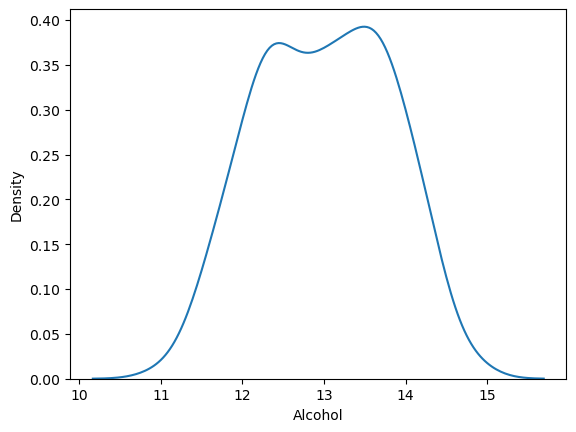

In [4]:
sns.kdeplot(df['Alcohol']);

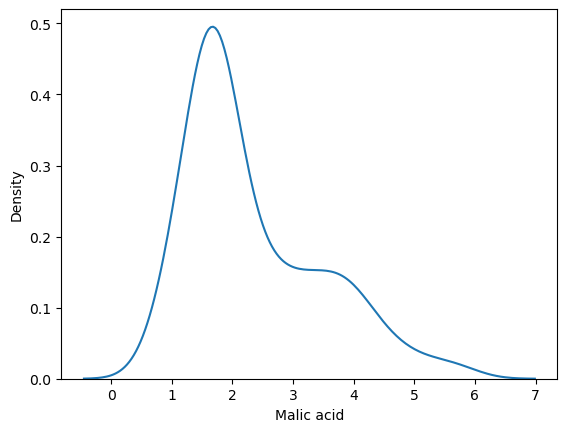

In [5]:
sns.kdeplot(df['Malic acid']);

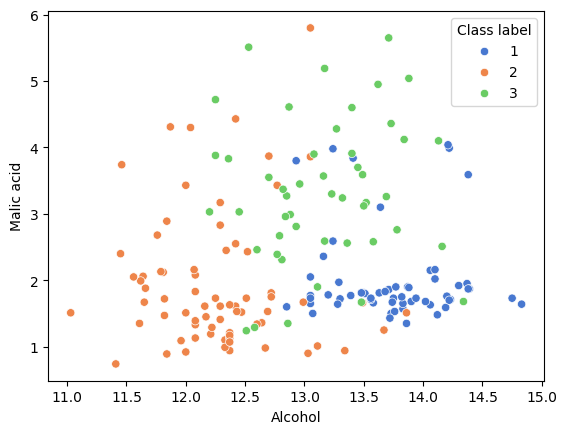

In [6]:
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label', palette='muted');

### Train Test Split

In [7]:
X, y = df.iloc[:, 1:3], df.iloc[:, 1]
X.shape, y.shape

((178, 2), (178,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((124, 2), (54, 2))

### MinMax Scaler

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_train.describe().round(2)

,Alcohol,Malic acid
count,124.00,124.00
mean,12.96,2.40
std,0.84,1.10
min,11.03,0.89
25%,12.29,1.64
50%,12.94,1.90
75%,13.70,3.17
max,14.83,5.80


In [12]:
X_train_scaled.describe().round(2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.51,0.31
std,0.22,0.22
min,0.00,0.00
25%,0.33,0.15
50%,0.50,0.21
75%,0.70,0.46
max,1.00,1.00


### Effect of Scaling

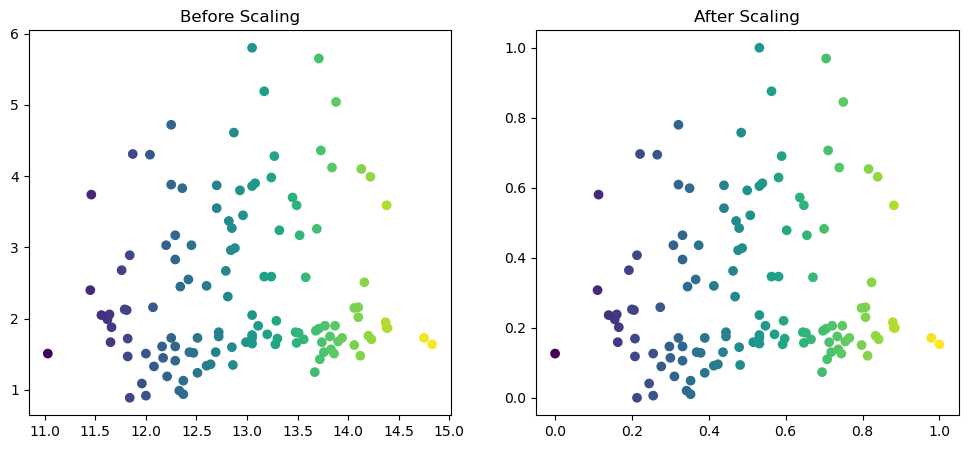

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

**The values are now in the range of [0, 1]**

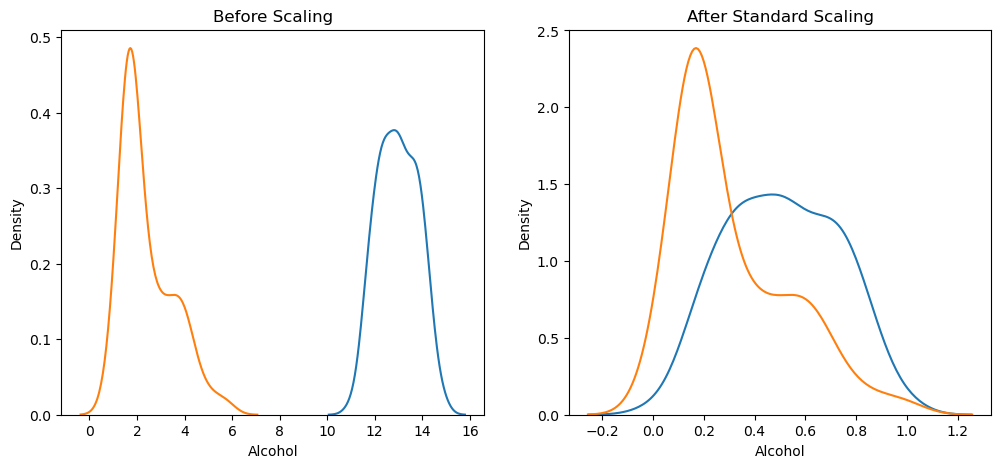

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

### Comparison of Distributions

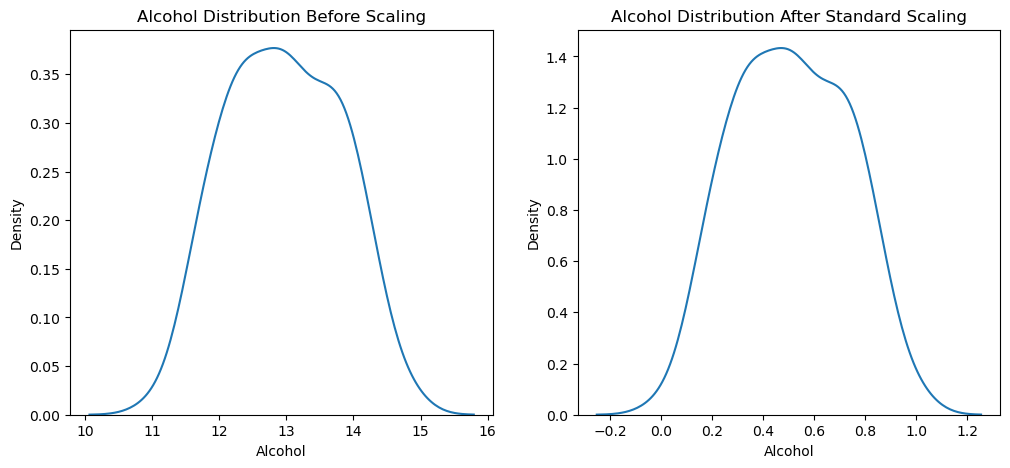

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

**Only the scale of the data is changed, not the distribution of the data. Shape might change since we are using a density plot.**

### Function to demonstrate - MinMaxScaler, MaxAbsScaler & RobustScaler

In [16]:
def scale_and_visualize(scaler, X_train, X_test, y_train, feature1='Alcohol', feature2='Malic acid'):
    # Fit and transform
    scaler_name = scaler.__class__.__name__
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Scatter Plot: Before and After Scaling
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(X_train[feature1], X_train[feature2], c=y_train)
    ax1.set_title(f"Before Scaling ({scaler_name})")
    ax1.set_xlabel(feature1)
    ax1.set_ylabel(feature2)

    ax2.scatter(X_train_scaled_df[feature1], X_train_scaled_df[feature2], c=y_train)
    ax2.set_title(f"After Scaling ({scaler_name})")
    ax2.set_xlabel(feature1)
    ax2.set_ylabel(feature2)

    plt.tight_layout()
    plt.show()

    # KDE Plot: Before and After Scaling
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.set_title(f'Before Scaling ({scaler_name})')
    sns.kdeplot(X_train[feature1], ax=ax1)
    sns.kdeplot(X_train[feature2], ax=ax1)

    ax2.set_title(f'After Scaling ({scaler_name})')
    sns.kdeplot(X_train_scaled_df[feature1], ax=ax2)
    sns.kdeplot(X_train_scaled_df[feature2], ax=ax2)

    plt.tight_layout()
    plt.show()

    return X_train_scaled_df, X_test_scaled_df

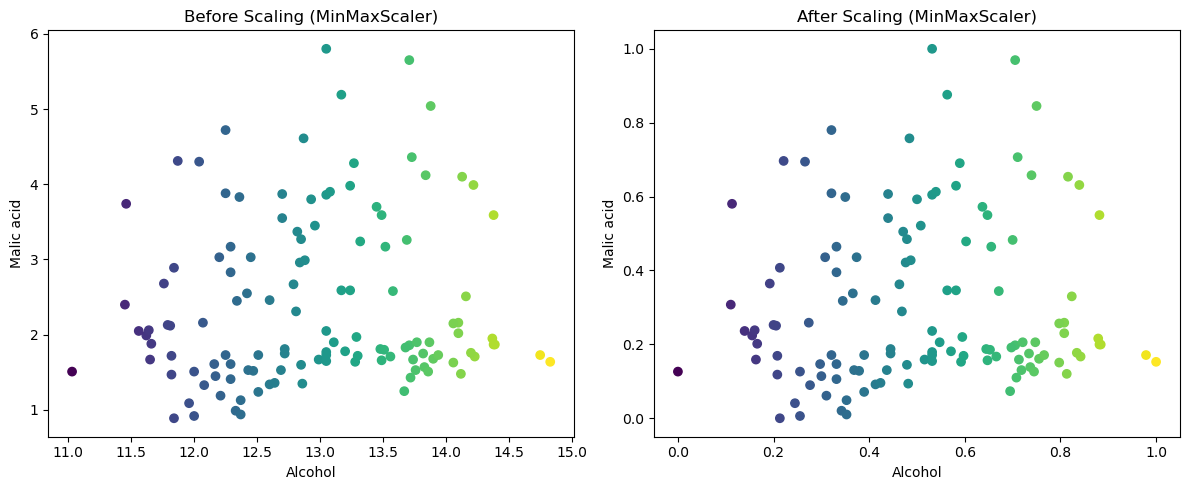

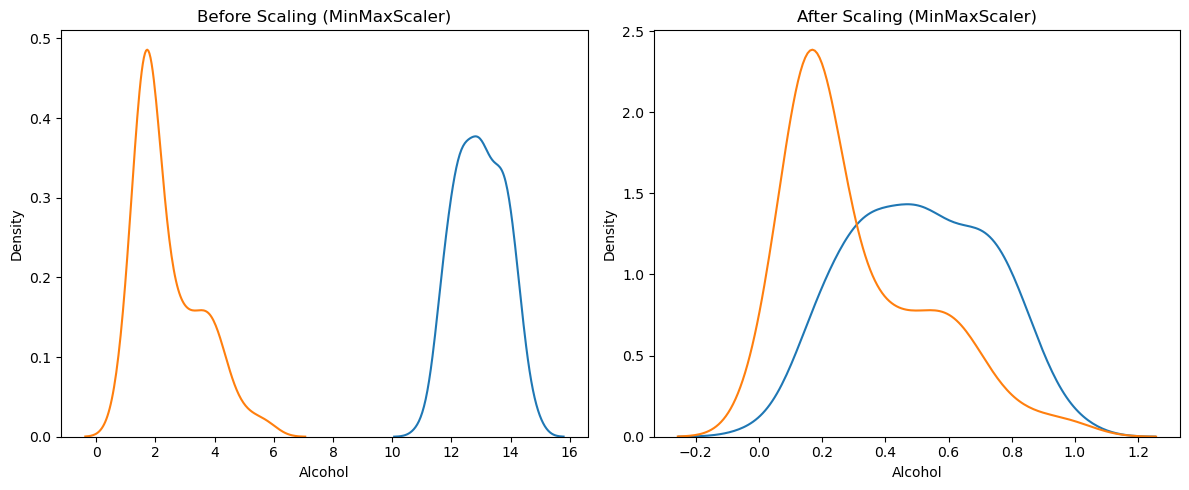

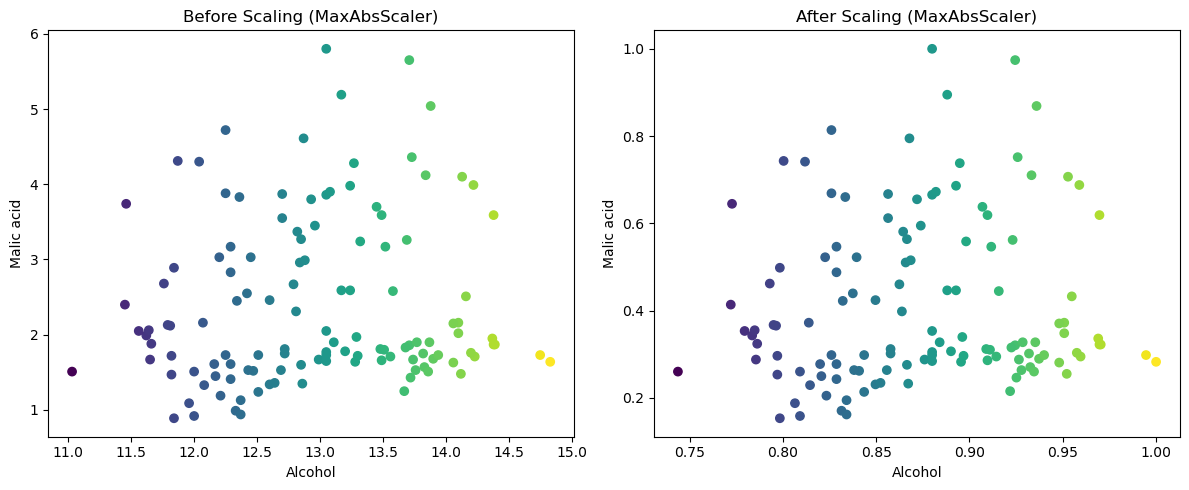

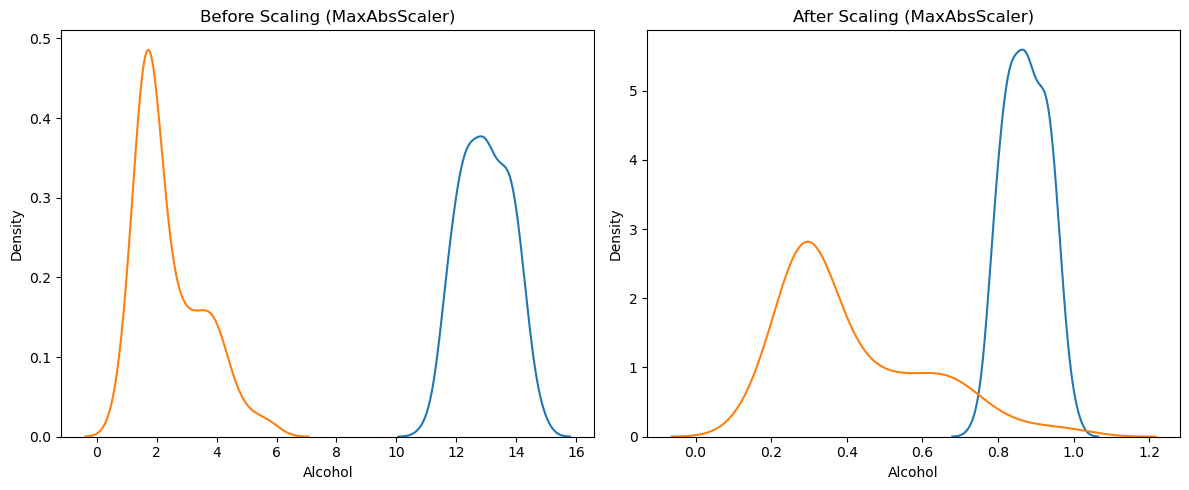

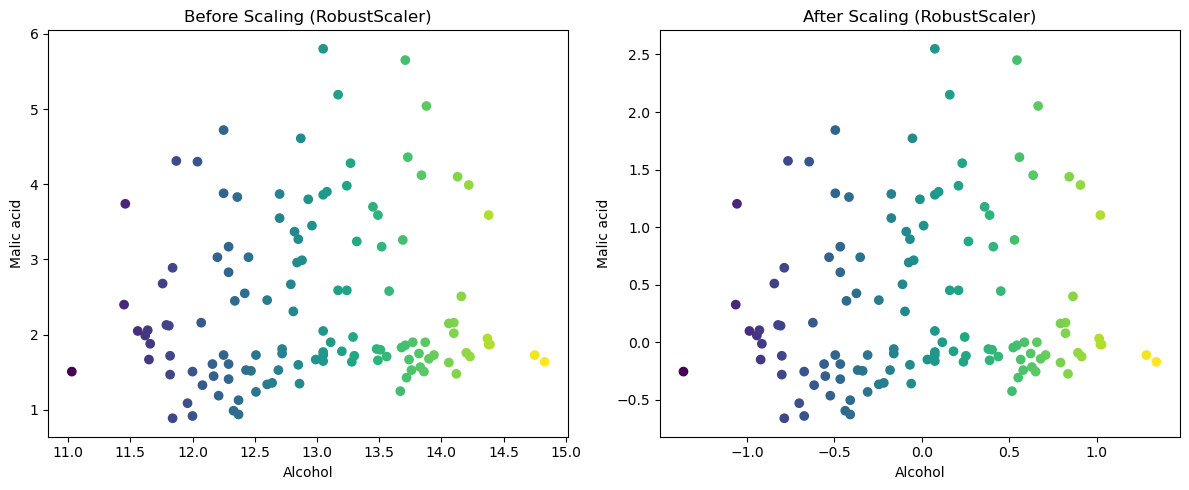

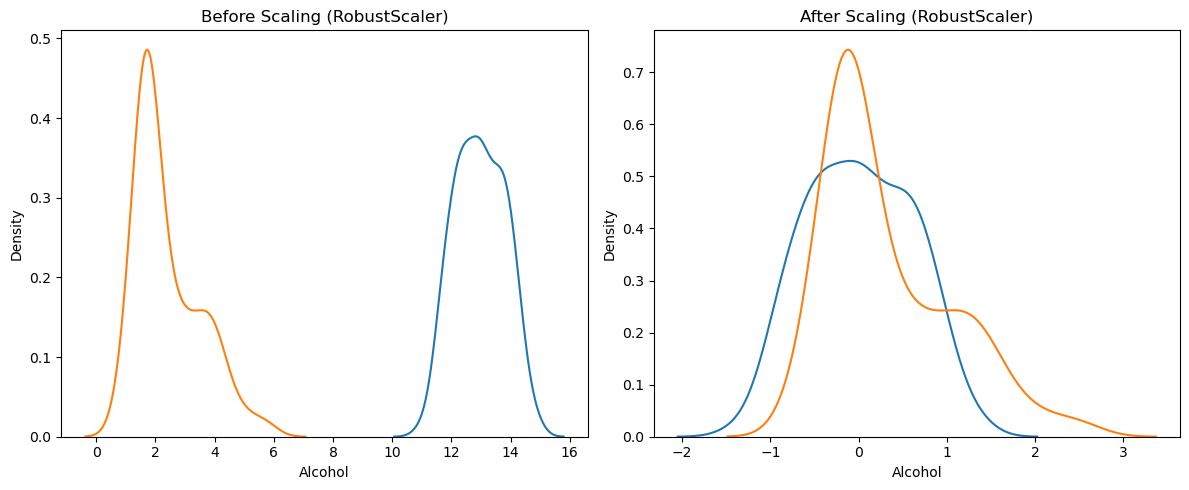

In [17]:
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
for scaler in scalers:
    X_train_scaled, X_test_scaled = scale_and_visualize(scaler, X_train, X_test, y_train)